1. Data Preparation
2. Visualization
3. Split Data into Train and Test
4. Normalisation
5. Create Logistic Regression Model
6. Predictions

In [1]:
# Data preparation using numpy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

np.random.seed(1)

data_01 = np.random.multivariate_normal(mean_01,cov_01,500)
data_02 = np.random.multivariate_normal(mean_02,cov_02,500)
data_02.shape

(500, 2)

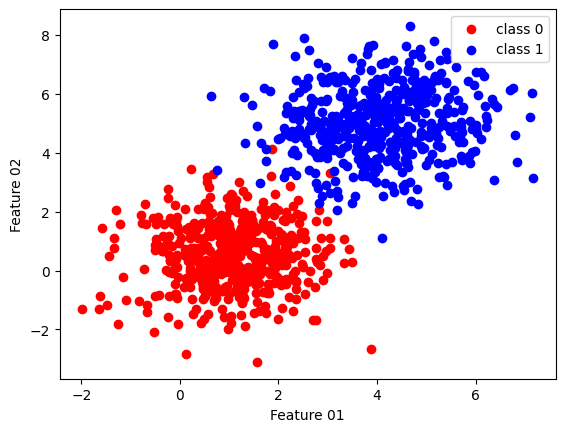

In [3]:
plt.scatter(data_01[:,0],data_01[:,1],color='red',label="class 0")
plt.scatter(data_02[:,0],data_02[:,1],color='blue',label="class 1")
plt.xlabel("Feature 01")
plt.ylabel("Feature 02")
plt.legend()
plt.show()

In [4]:
data = np.zeros((1000,3))
data[:500,:2] = data_01
data[500:,:2] = data_02
data[500:,-1] = 1

In [5]:
np.random.shuffle(data)

(800, 2) (800,) (200, 2) (200,)


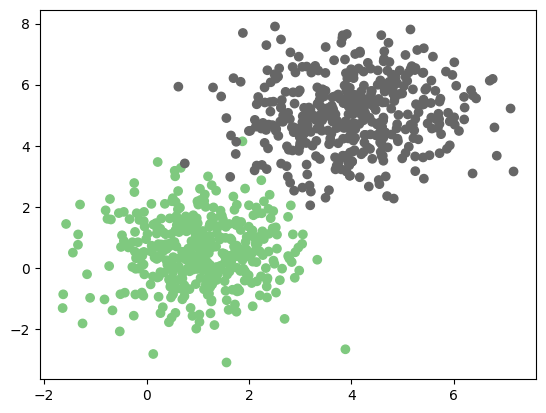

In [6]:
split = int(0.8*data.shape[0])
X_train = data[:split,:-1]
Y_train = data[:split,-1]

X_test = data[split:,:-1]
Y_test = data[split:,-1]

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

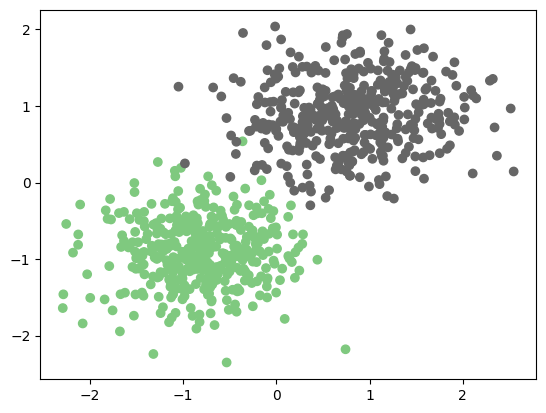

In [7]:
# Normalization
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train-mean)/std

X_test = (X_test-mean)/std

plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

In [8]:
one = np.ones((X_train.shape[0],1))
X_train = np.hstack((one,X_train))
Y_train = Y_train.reshape((-1,1))

In [9]:
def sigmoid(x):
  return 1.0/(1.0+np.exp(-x))

def hypothesis(X,theta):
  return sigmoid(np.dot(X,theta))

def error(X,y,theta):
  h = hypothesis(X,theta)
  e = -1.0*(np.mean(y*np.log(h)+(1-y)*np.log(1-h)))
  return e

def gradient(X,y,theta):
  m = X.shape[0]
  h = hypothesis(X,theta)
  grad = -1.0*np.dot(X.T,(y-h))
  return grad/m

def gradient_descent(X,y,lr=0.5,max_itr=500):
  n = X.shape[1]
  theta = np.zeros((n,1))
  error_list = []
  for i in range(max_itr):
    e = error(X,y,theta)
    grad = gradient(X,y,theta)
    theta = theta - lr*grad
    error_list.append(e)
  return theta, error_list

In [10]:
theta,error = gradient_descent(X_train,Y_train)

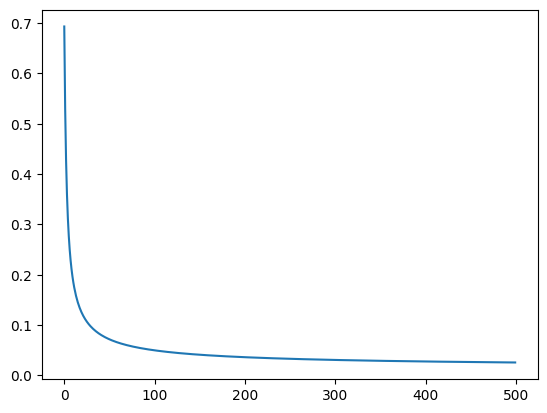

In [11]:
plt.plot(error)
plt.show()

In [12]:
theta.shape

(3, 1)

In [13]:
X_train.shape

(800, 3)

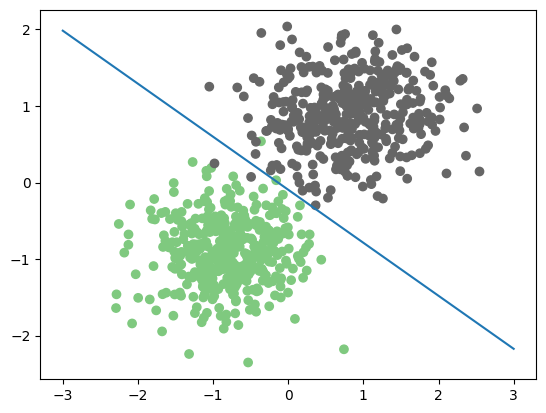

In [14]:
# Visualize the Decision Boundary
x1 = np.arange(-3,4)
x2 = -((theta[0]+theta[1]*x1)/theta[2])
plt.plot(x1,x2)
plt.scatter(X_train[:,1],X_train[:,2],c=Y_train,cmap=plt.cm.Accent)
plt.show()

In [22]:
X_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))

In [23]:
def predict(X,theta):
  h = hypothesis(X,theta)
  h[h>=0.5] = 1
  h[h<0.5] = 0
  return h

In [25]:
predictions = predict(X_test,theta)

In [35]:
def accuracy(actual,predictions):
  actual = actual.astype('int')
  acc = np.sum(actual == predictions)/actual.shape[0]
  return acc*100

In [36]:
print(accuracy(Y_test,predictions))

99.5


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()

In [43]:
X_train = X_train[:,1:]
model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [44]:
theta_0 = model.intercept_
theta_s = model.coef_
print(theta_0,theta_s)

[0.45102535] [[2.98145235 4.50170351]]


In [45]:
theta

array([[0.44000922],
       [3.22298422],
       [4.65446199]])

In [46]:
X_test = X_test[:,1:]
print(model.score(X_test,Y_test))

0.985
